In [1]:
from Bio import Entrez
from Bio.Entrez import efetch, esearch 
import json
import yaml

# Compile the vocabulary of drug names

In [2]:
drug_names_dict = {
        'phytocannabinoids': 'phytocannabinoid',
        'phytocannabinoid': 'phytocannabinoid',
        'cannabis': 'cannabis',
        'nabilone': 'nabilone',
        'dronabinol': 'dronabinol',

        # multi-word names should be fed as early as possible
        'cannabidiolic acid': 'CBDA',
        'tetrahydrocannabinolic acid': 'THCA',
        'cannabinolic acid': 'THCA',
        'tetrahydrocannabinnol': 'THCA',

        'cannabidiol': 'CBD',
        'cannabinoid': 'CBD',
        'cannabinoids': 'cannabinoid',

        'cannabinol': 'CBN',
        'tetrahydrocannabinol': 'THC',
        'deltatetrahydrocannabinol': 'THC',
        'carboxytetrahydrocannabinol': 'THC',

        'cannabivarin': 'CBV',
        'tetrahydrocannabivarin': 'THCV',
        'cannabidivarin': 'CBDV',

        'cannabigerol monomethyl ether': 'CBGM',
        'cannabigerol': 'CBG',

        'cannabigerovarin': 'CBGV',
        'cannabichromevarin': 'CBCV',
        'cannabielsoin': 'CBE',
        'cannabicitran': 'CBT',
        'tetrahydrocannabiphorol': 'THCP',
        'tetrahydrocannabiorcol': 'THCC',
        'cannabicyclol': 'CBL',
        'cannabichromene': 'CBC',
        'epoxyhexahydrocannabinol': 'EHHC',
        'cannabimovone': 'CBM',
        'cannabidiphorol': 'CBDP',
        'cannabicyclohexanol': 'cannabicyclohexanol'
}

In [3]:
with open('../world/drugs.yaml', 'r', encoding='utf-8') as f:
    drugs_full_dict = yaml.safe_load(f)

In [171]:
drugs_full_confident_list = set(drugs_full_dict.keys()).union({vv for v in drugs_full_dict.values() for vv in v})
drugs_full_confident_list = {v.lower() for v in drugs_full_confident_list}
len(drugs_full_confident_list)
assert 'cannabis' not in drugs_full_confident_list

In [4]:
all_keywords = set(drug_names_dict.keys()).union(set(drug_names_dict.values())).union(set(drugs_full_dict.keys()))
for v in drugs_full_dict.values():
    assert (isinstance(v, list)), v
    all_keywords.update(v)
    
print(len(all_keywords))

169


## Is the coverage wide enough?

### Do we at least cover the original "golden" training set?

Look at the original labelled data

In [5]:
import pandas as pd
df600 = pd.read_excel('../../data/export-26-10-20.xlsx', engine='openpyxl')

In [6]:
from collections import Counter
kw_count = Counter()

for i, row in df600.iterrows():
    haystack = ' {} \n {} '.format(row['Abstract'], df600['Article Name']).lower()
    matched = [kw for kw in all_keywords if f' {kw.lower()} ' in haystack]
    kw_count.update(matched)
    if not matched:
        print(row.PMID)

In [7]:
kw_count.most_common(10)

[('cannabis', 614),
 ('THC', 614),
 ('cannabidiol', 614),
 ('CBD', 292),
 ('cannabinoid', 220),
 ('cannabinoids', 160),
 ('phytocannabinoid', 49),
 ('tetrahydrocannabinol', 34),
 ('Tetrahydrocannabinol', 34),
 ('phytocannabinoids', 29)]

### How well do we cover the current database?

In [8]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

Look at the lastly exported data before the system was frozen

In [9]:
df_export = pd.read_csv('../../data/export-2.csv')
print(df_export.shape)
print(df_export.PMID.nunique())

(6773, 26)
3004


In [10]:
df_export.sample(3)

,Article Name,PMID,Keywords,Date of Publication,Abstract,Journal,Research Model,Indication,MESH,Compound,Drug,Effect,Route of Administration,Dose,Regimen,Side Effects,Minimum Age,Maximum Age,Gender,Ethnicity,Number of Patients,Type of Clinical Trial,Comorbidity,Drug Given in Combination,Cell Line,Animal
2316,[!] Vaping Synthetic Cannabinoids: A Novel Pre...,28469427,Animal models; e-cigarettes; synthetic cannabi...,2017,Smoking is the most common route of administra...,Substance abuse : research and treatment,NaN,hypothermia,NaN,cannabis,NaN,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4789,"[!] Effect of delta9-tetrahydrocannabinol, a c...",19068079,NaN,2009,OBJECTIVE. Transient lower oesophageal sphinct...,British journal of pharmacology,NaN,hypotension tachycardia,NaN,THC,NaN,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3910,[!] Respiratory depression following an accide...,31767538,NaN,2020,To report a case of accidental cannabidiol (CB...,Journal of the American Pharmacists Associatio...,NaN,Respiratory depression,NaN,THC,NaN,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_export['Article Name'].str.contains('\[!\]').value_counts()

True     6145
False     628
Name: Article Name, dtype: int64

In [12]:
kw_count = Counter()

for i, row in df_export.iterrows():
    haystack = ' {} \n {} '.format(row['Abstract'], df600['Article Name']).lower()
    matched = [kw for kw in all_keywords if f' {kw.lower()} ' in haystack]
    kw_count.update(matched)
    if not matched:
        print(row.PMID)

In [13]:
kw_count.most_common(10)

[('cannabis', 6773),
 ('THC', 6773),
 ('cannabidiol', 6773),
 ('cannabinoid', 2338),
 ('cannabinoids', 1691),
 ('CBD', 1448),
 ('tetrahydrocannabinol', 702),
 ('Tetrahydrocannabinol', 702),
 ('phytocannabinoids', 250),
 ('phytocannabinoid', 232)]

# Getting new papers

http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.ESearch

In [14]:
BUFFER_SIZE = 100_000
Entrez.email = 'dale.david@mail.ru'

In [15]:
def get_abstracts(start, term, buffer_size=BUFFER_SIZE):
    handle_one = Entrez.esearch(db="pubmed", term=term, retmode="xml", retstart=start, retmax=buffer_size)
    record = Entrez.read(handle_one) 
    if 'WarningList' in record and 'QuotedPhraseNotFound' in record['WarningList']:
        idlist = []
        query_length = 0
    else:
        idlist = record["IdList"]
        query_length = record['Count']
        
    return idlist, query_length

In [16]:
keywords = all_keywords
search_filter = '[Title/Abstract]'
# filter out reviews, as Dmitry suggested
search_filter = '[Title/Abstract] AND (Journal Article[pt] OR Randomized Controlled Trial[pt] OR Pragmatic Clinical Trial[pt] OR Controlled Clinical Trial[pt] OR Clinical Trial, Phase IV[pt] OR Clinical Trial, Phase III[pt] OR Clinical Trial, Phase II[pt] OR Clinical Trial, Phase I[pt] OR Clinical Trial[pt] OR Clinical Study[pt] OR Case Reports[pt] OR Adaptive Clinical Trial[pt]) NOT (Review[pt] OR Systematic Review[pt] OR Meta-Analysis[pt])'

In [17]:
from tqdm.auto import tqdm, trange

In [18]:
#keyword = 'cannabinoid'
#search_filter = '[Title/Abstract]'

The loop takes about 4 minutes

In [19]:
%%time

key2results = {}

for keyword in tqdm(keywords):
    list_of_ids = []
    start_at = 0
    # Iterate the search returning 100000
    while True:
        ids, length = get_abstracts(start_at, keyword.lower().replace(' ', '+') + search_filter)
        list_of_ids.extend(ids)

        # Break if less than 100K results were returned 
        if len(ids) < BUFFER_SIZE:
            break
        start_at += BUFFER_SIZE
    print (keyword + '\t' + str(len(list_of_ids)))
    if len(list_of_ids) != 0: 
        key2results[keyword] = list_of_ids

THC-C4	0
cannabicyclol	23
Cannabichromevarin	1
tetrahydrocannabinol	6614
CBND-C3	0
CBN-C2	0
Tetrahydrocannabinolic Acid	188
cannabinoid	13730
Delta-9-tetrahydrocannabivarin	26
10-Ethoxy-9-hydroxy-delta-6a-tetrahydrocannabinol	0
8,9-Dihydroxy-delta-6a-tetrahydrocannabinol	0
cannabichromene	112
CBLA	125
Cannabivarin	7
Cannabicyclolic acid	4
Cannabitriolvarin	0
Cannabiglendol	0
CBNM	4
CBG	1561
cannabinol	606
THCA-C1	0
cannabidivarin	61
CBDVA	6
Cannabidiorcol	1
CBN-C4	0
Cannabidiol monomethyl	0
Delta-8-tetrahydrocannabinolic acid	0
dronabinol	226
CBNA-C5 A	0
cannabicitran	2
CBDV	52
cis-THC	3
cannabivarin	7
triOH-THC	0
CBD-C4	0
phytocannabinoid	284
cannabigerol monomethyl ether	0
tetrahydrocannabivarin	83
THCVA	3
CBN-C3	0
Tetrahydrocannabivarin	83
Dehydrocannabifuran	1
Cannabinol-C4	0
Cannabidiol-C4	1
tetrahydrocannabiorcol	4
CBGA	52
CBDM	33
cannabielsoin	9
Cannabichromene	112
Cannabinovarin	0
CBEA-B	0
cannabis	16031
Cannabinodivarin	0
carboxytetrahydrocannabinol	8
THCC	16
CBR	1588
Cannabif

In [20]:
all_found = {idx for lst in key2results.values() for idx in lst}
print(len(all_found))

79784


### There were a few papers that we were not able to locate. Why?

In [21]:
print({str(idx) for idx in df600.PMID}.difference(all_found))

{'7668140', '25537576', '26901342', '32605447', '22716148', '20874519', '21845389', '12412834'}


In [22]:
print({str(idx) for idx in df_export.PMID}.difference(all_found))

{'31511618', '7668140', '33024079', '31857855', '11208344', '32969022', '32073423', '32906770', '31120281', '17112679', '21845389', '32654974', '25253990', '27302118', '24854631', '32780909', '30071983', '29152433', '30753761', '29557759', '32605447', '23544909', '33217668', '26569549', '20874519', '31634567', '30136546', '12412834', '25537576', '29022873', '18332890', '26901342', '32562120', '32699671', '31934840', '30543310', '31613959', '31168642', '32086163', '22352284', '22716150', '29406477', '32701785', '32341064', '32051101', '24663230', '26856781', '14640935', '32974048', '31196620', '32339005', '6321091', '28102593', '32592183', '32628766', '22716148', '31526646'}


* 32605447 -> correction to 31109198
* 11208344 -> delta-9-etrahydrocannabinol - a typo (it was "tetra")
* 29022873 -> duplicate of 29481316
* 33024079 -> duplicate of 31632740
* 33217668 -> Eucannabinolide (Euc) - a novel substance

In [23]:
assert '31109198' in all_found  # to this 32605447 was an erratum
assert '29481316' in all_found 
assert '31632740' in all_found 

In [24]:
print(efetch(db='pubmed', id=['32605447'], retmode='json', rettype='abstract').read().decode('utf-8'))


1. Am J Psychiatry. 2020 Jul 1;177(7):641. doi:
10.1176/appi.ajp.2020.18101191correction.

Correction to Hurd et al.

[No authors listed]

Erratum for
    Am J Psychiatry. 2019 Nov 1;176(11):911-922.

DOI: 10.1176/appi.ajp.2020.18101191correction 
PMID: 32605447 




# Download the abstracts

In [25]:
print(efetch(db='pubmed', id=['11208344'], retmode='json', rettype='abstract').read().decode('utf-8'))


1. Med Sci Monit. 2000 Mar-Apr;6(2):386-9.

Paroxysmal atrial fibrillation in a young female patient following marijuana
intoxication--a case report of possible association.

Kosior DA(1), Filipiak KJ, Stolarz P, Opolski G.

Author information: 
(1)Department and Division of Internal Medicine and Cardiology, Medical
University, ul. Banacha 1a, 02-097 Warsaw, Poland.

Marijuana is one of the most popular drugs legally admitted for general sale in
many countries. To consider it safe and unlikely to develop drug dependence is
abusive. The use of marijuana as a herbal medication is being widely discussed in
literature. The most promising effect of delta-9-etrahydrocannabinol seems to be 
observed in the case of nausea, following cancer chemotherapy. Despite its
positive action on the human organism, marijuana smoking has been shown to exert 
adverse effects on the cardiovascular system causing well-tolerated tachycardia
and/or hypotension. We also observed that marijuana abuse was associa

In [26]:
import os 
import sys

def add_sys_path(p): 
    p = os.path.abspath(p)
    print(p)
    if p not in sys.path:
        sys.path.append(p)
        
add_sys_path('..')

C:\Users\david\YandexDisk\mlwork\cannabis\cannabis_system


In [92]:
import loaders.parsers
from importlib import reload
reload(loaders.parsers)
from loaders.parsers import PubMedXMLParser

fetched = efetch(db='pubmed', id=pm_ids[0:10], retmode='xml', rettype='abstract').read() #.decode('utf-8')
aa = list(PubMedXMLParser.parse_file(fetched))
import xmltodict
fff = xmltodict.parse(fetched)
a = fff['PubmedArticleSet']['PubmedArticle'][0]
a.keys()

In [45]:
abstracts = {}

In [46]:
pm_ids = sorted(all_found)
batch_size = 300

And this loop takes about ~~2 hours~~ 20 minutes, shit!

In [94]:
for i in trange(0, len(pm_ids), batch_size):
    fetched = efetch(db='pubmed', id=pm_ids[i:(i+batch_size)], retmode='xml', rettype='abstract').read() #.decode('utf-8')
    aa = list(PubMedXMLParser.parse_file(fetched))
    for abstract in aa:
        abstracts[abstract['pmid']] = abstract
    print(len(aa), len(abstracts), end='\r')

284 79066


text = efetch(db='pubmed', id=['32387338'], retmode='xml', rettype='abstract').read()
list(PubMedXMLParser.parse_file(text))
parsed = xmltodict.parse(text)
parsed
parsed['PubmedArticleSet']['PubmedArticle']['MedlineCitation']['Article']['ArticleDate']

In [95]:
Counter(type(v) for v in abstracts.values())

Counter({dict: 79066})

In [96]:
for k, v in abstracts.items():
    if isinstance(v, list):
        print(k)

In [97]:
long_df = pd.DataFrame.from_dict(abstracts).T

In [98]:
long_df.shape

(79066, 11)

In [99]:
long_df.to_pickle('../../data/long_df_july.pkl')

In [100]:
long_df = pd.read_pickle('../../data/long_df_july.pkl')
long_df.shape

(79066, 11)

In [101]:
long_df.sample(10)

,pmid,id,abstract_texts,date,journal_title,title,authors,date_completed,date_revised,date_article,collective_name
29123790,29123790,pubmed_29123790,[{'text': 'Reporting of the analytical and cli...,2016,Acute medicine & surgery,Clinical and toxicological findings of acute i...,"[{'last_name': 'Fujita', 'first_name': 'Yuji',...",NaT,2020-09-30,2015-12-28,NaN
26378734,26378734,pubmed_26378734,[{'text': 'Cognitive behavioural therapy (CBT)...,2015,Journal of affective disorders,Regional homogeneity of spontaneous brain acti...,"[{'last_name': 'Yang', 'first_name': 'Xiang-Yu...",2016-06-10,2018-12-02,2015-08-28,NaN
8886945,8886945,pubmed_8886945,[{'text': 'The associations between early onse...,1996,Journal of abnormal child psychology,The short-term consequences of early onset can...,"[{'last_name': 'Fergusson', 'first_name': 'D M...",1997-02-27,2019-12-10,NaT,NaN
22294831,22294831,pubmed_22294831,[{'text': 'To evaluate the efficacy of intradu...,2012,World journal of gastroenterology,Efficacy of intraductal ultrasonography in the...,"[{'last_name': 'Lu', 'first_name': 'Jie', 'ini...",2012-03-09,2019-12-10,NaT,NaN
26372461,26372461,pubmed_26372461,[{'text': 'The regulation of cerebral blood fl...,2015,PloS one,Primary Somatosensory Cortices Contain Altered...,"[{'last_name': 'Hodkinson', 'first_name': 'Dun...",2016-05-31,2018-11-13,2015-09-15,NaN
22046151,22046151,pubmed_22046151,[{'text': 'The error-related negativity (ERN) ...,2011,Frontiers in behavioral neuroscience,Acute effects of delta-9-tetrahydrocannabinol ...,"[{'last_name': 'Spronk', 'first_name': 'Desiré...",2011-11-10,2020-09-29,2011-09-21,NaN
31099373,31099373,pubmed_31099373,[{'text': 'Antisense oligonucleotides (ASOs) a...,2019,Organic & biomolecular chemistry,Synthesis and biophysical properties of carbam...,"[{'last_name': 'Thorpe', 'first_name': 'Camero...",2019-12-20,2019-12-20,NaT,NaN
6650124,6650124,pubmed_6650124,[{'text': 'The present study addresses the pro...,1983,Acta neurologica Scandinavica,Local blood flow and glucose consumption in th...,"[{'last_name': 'Ingvar', 'first_name': 'M', 'i...",1984-01-27,2019-08-14,NaT,NaN
22445897,22445897,pubmed_22445897,[{'text': 'The enhancement of emotional memory...,2012,Neurobiology of learning and memory,Cannabinoid receptors activation and glucocort...,"[{'last_name': 'Ramot', 'first_name': 'Assaf',...",2012-09-17,2021-02-23,2012-03-16,NaN
29425160,29425160,pubmed_29425160,[{'text': 'Grinding is one of the essential ma...,2018,"Materials (Basel, Switzerland)",Elucidating Grinding Mechanism by Theoretical ...,"[{'last_name': 'Ullah', 'first_name': 'Amm Sha...",NaT,2020-10-01,2018-02-09,NaN


In [102]:
long_df.loc['4401981']

pmid                                                         4401981
id                                                    pubmed_4401981
abstract_texts                                                   NaN
date                                                            1972
journal_title               The Journal of pharmacy and pharmacology
title              A simple method for the preparation of injecta...
authors            [{'last_name': 'Moreton', 'first_name': 'J E',...
date_completed                                   1972-07-14 00:00:00
date_revised                                     2019-07-10 00:00:00
date_article                                                     NaT
collective_name                                                  NaN
Name: 4401981, dtype: object

In [103]:
silver_ids = set(df_export.PMID.astype(str)).union(set(df600.PMID.astype(str)))
print(len(silver_ids))
golden_ids = set(df_export[~df_export['Article Name'].str.contains('\[!\]')].PMID.astype(str)).union(set(df600.PMID.astype(str)))
print(len(golden_ids))

3004
526


In [113]:
long_df['abstract'] = long_df.abstract_texts.apply(lambda x: '\n\n'.join([a['text'] for a in x]) if isinstance(x, list) else x)

In [104]:
long_df['is_golden'] = long_df.pmid.apply(lambda x: 'golden' if x in golden_ids else 'silver' if x in silver_ids else 'none')
long_df['is_golden'].value_counts()

none      76119
silver     2429
golden      518
Name: is_golden, dtype: int64

In [105]:
long_df.groupby('is_golden').date_article.max()

is_golden
golden   2020-07-24
none     2021-12-23
silver   2020-12-02
Name: date_article, dtype: datetime64[ns]

In [106]:
long_df.groupby('is_golden').date_article.quantile(0.9999)

is_golden
golden   2016-10-02 21:24:28.800
none     2010-08-12 20:26:52.800
silver   2012-07-05 21:36:00.000
Name: date_article, dtype: datetime64[ns]

In [197]:
since_december = long_df[long_df.date_article >= '2020-12-02']
print(since_december.shape)
since_december = since_december[since_december.abstract.notnull()]
print(since_december.shape)
since_december = since_december[since_december.abstract.str.lower().str.contains('canna')]
print(since_december.shape)
# since_december.to_csv('../../data/papers_since_december_2.tsv', sep='\t')
since_december = since_december[since_december.abstract.apply(
    lambda x: any(drug in x.lower() for drug in drugs_full_confident_list)
)]
print(since_december.shape)

(3513, 13)
(3433, 13)
(1704, 13)
(572, 13)


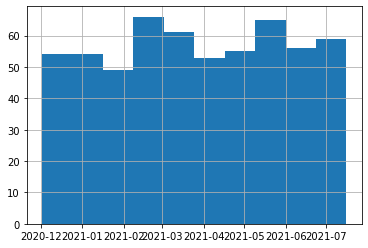

In [198]:
since_december.date_article.hist();

In [199]:
since_december.to_csv('../../data/papers_since_december_3.tsv', sep='\t')

In [133]:
witha = long_df[long_df.abstract.notnull()]

Быстрый способ обрезать нерелевантное

In [194]:
witha.groupby('is_golden').abstract.aggregate(lambda x: x.str.lower().str.contains('canna').mean())

is_golden
golden    1.000000
none      0.360551
silver    0.982971
Name: abstract, dtype: float64

In [193]:
witha.groupby('is_golden').abstract.aggregate(lambda x: x.apply(
    lambda x: 'canna' in x.lower() and any(drug in x.lower() for drug in drugs_full_confident_list)
).mean())

is_golden
golden    0.994208
none      0.083912
silver    0.812261
Name: abstract, dtype: float64

In [192]:
gg = witha[witha.is_golden=='golden']
bg = gg[~gg.abstract.apply(lambda x: 'canna' in x.lower() and any(drug in x.lower() for drug in drugs_full_confident_list))]
print(gg.shape[0], bg.shape[0])

518 3


In [202]:
bg.title

24525548    Nabiximols (THC/CBD oromucosal spray, Sativex®...
29528549    Clinical response to Nabiximols correlates wit...
29550881    The effect of nabilone on appetite, nutritiona...
Name: title, dtype: object

In [204]:
bg.pmid

24525548    24525548
29528549    29528549
29550881    29550881
Name: pmid, dtype: object

In [201]:
for a in bg.abstract:
    print(a)
    print('\n\n---\n\n')

Nabiximols (Sativex®), a cannabinoid-based oromucosal spray, is an add-on therapy for patients with moderate to severe multiple sclerosis spasticity (MSS) resistant to other medications. The primary objective was to provide real-life observational data of clinical experience of nabiximols in contrast to formal clinical trials of effectiveness.

This was an observational, prospective, multicenter, non-interventional study with a follow-up period of 3-4 months, conducted in routine care setting in Germany. Patients with moderate to severe MSS were included at nabiximols' initiation. Structured documentation forms, questionnaires and validated instruments were used for data collection at inclusion, 1 and 3 months after inclusion.

Overall, 335 patients were assessed of whom 276 fitted the criteria and were included in the effectiveness analysis. After 1 month, nabiximols provided relief of resistant MSS in 74.6% of patients according to specialist assessment; mean spasticity 0-10 numerica

In [62]:
long_df[long_df.is_golden != 'none'].date_completed.max()

Timestamp('2021-07-14 00:00:00')

In [75]:
long_df[long_df.is_golden=='silver'].sort_values('date_completed', ascending=False).head(10)

,pmid,id,abstract_texts,date,journal_title,title,authors,date_completed,date_revised,collective_name,is_golden
32387338,32387338,pubmed_32387338,[{'text': 'The antioxidant and CB-2 receptor a...,2020,Neurobiology of disease,Beneficial effects of the phytocannabinoid Δ-9...,"[{'last_name': 'Espadas', 'first_name': 'Isabe...",2021-07-14,2021-07-14,NaN,silver
32513180,32513180,pubmed_32513180,"[{'text': 'In 2016, the Australian federal gov...",2020,Harm reduction journal,Medical cannabis use in the Australian communi...,"[{'last_name': 'Lintzeris', 'first_name': 'Nic...",2021-07-12,2021-07-12,NaN,silver
33220620,33220620,pubmed_33220620,[{'text': 'Evidence suggests that cannabinoids...,2020,Complementary therapies in medicine,Perceptions and recommendation behaviors of de...,"[{'last_name': 'Yeroushalmi', 'first_name': 'S...",2021-07-09,2021-07-09,NaN,silver
32267192,32267192,pubmed_32267192,[{'text': 'Cannabinoids may potentiate opioid ...,2020,"Journal of psychopharmacology (Oxford, England)",Evaluating the co-use of opioids and cannabis ...,"[{'last_name': 'Bergeria', 'first_name': 'Ceci...",2021-07-08,2021-07-08,NaN,silver
32108548,32108548,pubmed_32108548,[{'text': 'Cannabis use has been associated wi...,2020,"Journal of psychopharmacology (Oxford, England)",Synthetic cannabinoid use in psychiatric patie...,"[{'last_name': 'Hobbs', 'first_name': 'Melissa...",2021-07-08,2021-07-08,NaN,silver
33127240,33127240,pubmed_33127240,[{'text': 'Cannabis hyperemesis (CH) is an und...,2021,The Journal of adolescent health : official pu...,Pediatric Cannabinoid Hyperemesis: A Single In...,"[{'last_name': 'Lonsdale', 'first_name': 'Hann...",2021-07-05,2021-07-05,NaN,silver
32732454,32732454,pubmed_32732454,[{'text': 'Rugby is characterized by frequent ...,2020,International journal of sport nutrition and e...,High Prevalence of Cannabidiol Use Within Male...,"[{'last_name': 'Kasper', 'first_name': 'Andrea...",2021-06-30,2021-06-30,NaN,silver
31162770,31162770,pubmed_31162770,[{'text': 'The administration of cannabidiol h...,2020,Addiction biology,The pharmacological reduction of hippocampal n...,"[{'last_name': 'Luján', 'first_name': 'Miguel ...",2021-06-28,2021-06-28,NaN,silver
31215752,31215752,pubmed_31215752,[{'text': 'A growing number of studies suggest...,2020,Addiction biology,Cannabidiol inhibits sucrose self-administrati...,"[{'last_name': 'Bi', 'first_name': 'Guo-Hua', ...",2021-06-28,2021-07-02,NaN,silver
31767538,31767538,pubmed_31767538,[{'text': 'To report a case of accidental cann...,2020,Journal of the American Pharmacists Associatio...,Respiratory depression following an accidental...,"[{'last_name': 'Herbst', 'first_name': 'Jim', ...",2021-06-25,2021-06-25,NaN,silver


In [46]:
long_df.groupby(['is_golden', 'date']).title.count().unstack().T

is_golden,golden,none,silver
date,,,
1843,NaN,1.0,NaN
1845,NaN,1.0,NaN
1847,NaN,1.0,NaN
1866,NaN,1.0,NaN
1870,NaN,1.0,NaN
1871,NaN,1.0,NaN
1883,NaN,2.0,NaN
1885,NaN,1.0,NaN
1886,NaN,1.0,NaN


In [47]:
long_df.isnull().mean()

pmid               0.000000
id                 0.000000
abstract_texts     0.061743
date               0.000000
journal_title      0.000000
title              0.000012
authors            0.004452
collective_name    0.990679
is_golden          0.000000
dtype: float64

In [48]:
long_df.abstract_texts.apply(type).value_counts()

<class 'list'>     76498
<class 'float'>     5034
Name: abstract_texts, dtype: int64

In [64]:
import numpy as np

def get_joint_text(row):
    parts = []
    if not pd.isnull(row.title):
        parts.append(row.title)
    if not isinstance(row.abstract_texts, float):
        parts.extend([t['text'] for t in row.abstract_texts])
    return '\n\n'.join(parts)

In [66]:
joint_texts = long_df.apply(get_joint_text, axis=1)

In [67]:
(long_df.is_golden == 'golden').sum() / (long_df.is_golden != 'none').sum()

0.17392761394101877

In [68]:
X_pos, X_mixed = joint_texts[long_df.is_golden=='golden'], joint_texts[long_df.is_golden=='none'].sample(2000, random_state=1)

In [69]:
X_pos.shape, X_mixed.shape

((519,), (2000,))

In [70]:
y_pos, y_mixed = np.ones(len(X_pos)), np.zeros(len(X_mixed))

In [71]:
X, y = pd.concat([X_pos, X_mixed]), np.concatenate([y_pos, y_mixed])

In [72]:
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [73]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
pipe = make_pipeline(CountVectorizer(min_df=5), LogisticRegression(C=0.1, max_iter=3_000))

The separation is surprisingly good

In [74]:
print(cross_val_score(pipe, X, y, cv=cv, scoring='roc_auc'))

[0.98308325 0.98555621 0.98719663]


In [75]:
cannabity = cross_val_predict(pipe, X, y, method='predict_proba', cv=cv)[:, 1]

In [76]:
pipe.fit(X, y)

Pipeline(steps=[('countvectorizer', CountVectorizer(min_df=5)),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=3000))])

In [77]:
long_df['relevance1'] = pipe.predict_proba(joint_texts)[:, 1]

In [78]:
long_df.loc[X.index, 'relevance1'] = cannabity

In [79]:
long_df.loc[X.index, 'relevance1'].groupby(y).describe()

,count,mean,std,min,25%,50%,75%,max
0.0,2000.0,0.039871,0.136229,6.502277e-07,0.000879,0.003845,0.013486,0.999967
1.0,519.0,0.816411,0.252843,1.838567e-03,0.748137,0.940588,0.993632,1.000000


In [80]:
pd.Series(cannabity).groupby(y).quantile([0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1]).unstack().T

,0.0,1.0
0.00,6.502277e-07,0.001839
0.01,1.908222e-05,0.037408
0.05,9.809581e-05,0.226178
0.10,2.333584e-04,0.378788
0.25,8.794504e-04,0.748137
0.50,3.845341e-03,0.940588
0.75,1.348631e-02,0.993632
0.90,5.432138e-02,0.998785
0.95,1.993673e-01,0.999794
0.99,8.844293e-01,0.999996


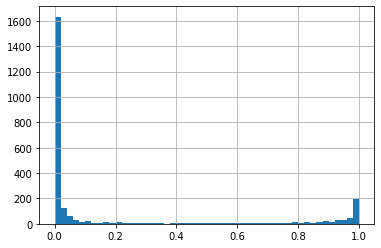

In [81]:
pd.Series(cannabity).hist(bins=50);

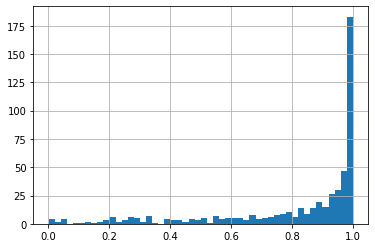

In [82]:
pd.Series(cannabity)[y==1].hist(bins=50);

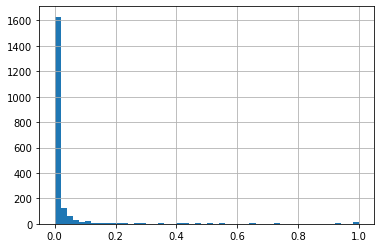

In [83]:
pd.Series(cannabity)[y==0].hist(bins=50);


* 5-10% - преимущественно мусор
* 10-20% - есть некоторое количество релевантных
* 20-35% - довольно много релевантных
* 35-50% - большинство релевантные

In [84]:
long_df.to_pickle('../../data/long_df_june.pkl')

In [85]:
for text in X[(cannabity > 0.10) & (cannabity <= 0.20) & (y == 0)].sample(10):
    print(text)
    print('-------------')

15-Lipoxygenase metabolism of 2-arachidonylglycerol. Generation of a peroxisome proliferator-activated receptor alpha agonist.

The recent demonstrations that cyclooxygenase-2 and leukocyte-type 12-lipoxygenase (LOX) efficiently oxygenate 2-arachidonylglycerol (2-AG) prompted an investigation into related oxygenases capable of metabolizing this endogenous cannabinoid receptor ligand. We evaluated the ability of six LOXs to catalyze the hydroperoxidation of 2-AG. Soybean 15-LOX, rabbit reticulocyte 15-LOX, human 15-LOX-1, and human 15-LOX-2 oxygenate 2-AG, providing 15(S)-hydroperoxyeicosatetraenoic acid glyceryl ester. In contrast, potato and human 5-LOXs do not efficiently metabolize this endocannabinoid. Among a series of structurally related arachidonyl esters, arachidonylglycerols serve as the preferred substrates for 15-LOXs. Steady-state kinetic analysis demonstrates that both 15-LOX-1 and 15-LOX-2 oxygenate 2-AG comparably or preferably to arachidonic acid. Furthermore, 2-AG tre

In [433]:
print(efetch(db='pubmed', id=['27022312'], retmode='json', rettype='abstract').read().decode('utf-8'))


1. Curr Oncol. 2016 Mar;23(2):S33-6. doi: 10.3747/co.23.2962. Epub 2016 Mar 16.

Use of cannabinoids in cancer care: palliative care.

Aggarwal SK(1).

Author information: 
(1)Adult Palliative Medicine Services, MultiCare Auburn Medical Center, and
MultiCare Institute for Research and Innovation, Auburn, WA, U.S.A.

DOI: 10.3747/co.23.2962 
PMCID: PMC4791145
PMID: 27022312 




In [436]:
delta = long_df[long_df.abstract_texts.notnull() & (long_df.is_golden != 'golden') & (long_df.relevance1 > 0.2)].copy()

In [437]:
delta.shape

(4877, 10)

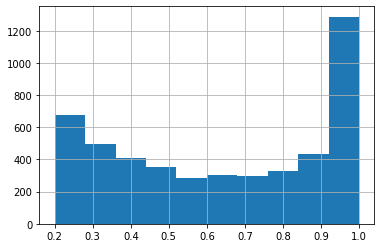

In [438]:
delta.relevance1.hist();

In [86]:
long_df.to_pickle('../../data/long_df_june.pkl')

In [442]:
delta.to_pickle('../../data/long_df_delta_june.pkl')

In [457]:
delta.to_csv('../../data/long_df_delta_june.csv', index=None)

In [458]:
d2 = pd.read_csv('../../data/long_df_delta_june.csv')

In [459]:
d2

,pmid,id,abstract_texts,date,journal_title,title,authors,collective_name,is_golden,relevance1,abstract
0,1005489,pubmed_1005489,[{'text': 'The pharmacological interaction bet...,1976,"Pharmacology, biochemistry, and behavior",Ethanol and delta-9-tetrahydrocannabinol: mech...,"[{'last_name': 'Sprague', 'first_name': 'G L',...",NaN,none,0.997469,The pharmacological interaction between equipo...
1,10065936,pubmed_10065936,[{'text': 'This study compared the effects of ...,1998,Behavioural pharmacology,Effects of delta-9-tetrahydrocannabinol and (R...,"[{'last_name': 'Järbe', 'first_name': 'T U', '...",NaN,none,0.721862,This study compared the effects of (R)-methana...
2,10090646,pubmed_10090646,[{'text': 'Symptoms of dependence and withdraw...,1999,Psychopharmacology,Abstinence symptoms following oral THC adminis...,"[{'last_name': 'Haney', 'first_name': 'M', 'in...",NaN,silver,0.892005,Symptoms of dependence and withdrawal after th...
3,10098887,pubmed_10098887,[{'text': 'The effects of cannabinoids on keto...,1999,Journal of neurochemistry,The stimulation of ketogenesis by cannabinoids...,"[{'last_name': 'Blázquez', 'first_name': 'C', ...",NaN,none,0.786678,The effects of cannabinoids on ketogenesis in ...
4,1012982,pubmed_1012982,[{'text': 'The daily application in rats of d-...,1976,Polish journal of pharmacology and pharmacy,An attempt to correlate the development of tol...,"[{'last_name': 'Magour', 'first_name': 'S', 'i...",NaN,none,0.368673,The daily application in rats of d-amphetamine...
...,...,...,...,...,...,...,...,...,...,...,...
4872,991940,pubmed_991940,[{'text': 'The effects of delta9-THC and its e...,1976,European journal of pharmacology,The influence of delta9-tetrahydrocannabinol o...,"[{'last_name': 'Nagle', 'first_name': 'B', 'in...",NaN,silver,0.279677,The effects of delta9-THC and its ethanol vehi...
4873,996043,pubmed_996043,[{'text': 'The preoptic region (POR) is a prim...,1976,"Pharmacology, biochemistry, and behavior",Hypothermia induced by delta9-tetrahydrocannab...,"[{'last_name': 'Schmeling', 'first_name': 'W T...",NaN,silver,0.851555,The preoptic region (POR) is a primary central...
4874,996059,pubmed_996059,"[{'text': ""Albino rats were given extensive tr...",1976,"Pharmacology, biochemistry, and behavior",Role of experience in acquisition and loss of ...,"[{'last_name': 'Manning', 'first_name': 'F J',...",NaN,none,0.623145,Albino rats were given extensive training in s...
4875,9988095,pubmed_9988095,[{'text': 'Clinical and basic research studies...,1999,European journal of pharmacology,Chronic-delta9-tetrahydrocannabinol treatment ...,"[{'last_name': 'Gorriti', 'first_name': 'M A',...",NaN,silver,0.940650,Clinical and basic research studies have linke...


In [446]:
delta.date.value_counts().sort_index()

1970      1
1971      1
1972      3
1973      7
1974      2
1975     39
1976     43
1977     46
1978     32
1979     30
1980     38
1981     51
1982     35
1983     34
1984     27
1985     32
1986     38
1987     40
1988     34
1989     27
1990     26
1991     43
1992     39
1993     36
1994     31
1995     48
1996     33
1997     39
1998     57
1999     37
2000     57
2001     61
2002     70
2003     79
2004     99
2005    100
2006    107
2007    118
2008    126
2009     89
2010    144
2011    166
2012    180
2013    165
2014    191
2015    163
2016    177
2017    227
2018    251
2019    386
2020    591
2021    381
Name: date, dtype: int64

In [460]:
ss = delta.sample(10)

In [461]:
for i, row in ss.iterrows():
    print(row.title)
    print(row.relevance1)
    for a in row.abstract_texts:
        print(a['text'])
    print('\n~~~~~~~~~\n')

Sensory gating in tobacco-naïve cannabis users is unaffected by acute nicotine administration.
0.21379890500709467
Long-term cannabis use has been associated with the appearance of psychotic symptoms and schizophrenia-like cognitive impairments; however these studies may be confounded by concomitant use of tobacco by cannabis users. We aimed to determine if previously observed cannabis-associated deficits in sensory gating would be seen in cannabis users with no history of tobacco use, as evidenced by changes in the P50, N100, and P200 event-related potentials. A secondary objective of this study was to examine the effects of acute nicotine administration on cannabis users with no tobacco use history.
Three components (P50, N100, P200) of the mid-latency auditory-evoked response (MLAER) were elicited by a paired-stimulus paradigm in 43 healthy, non-tobacco smoking male volunteers between the ages of 18-30. Cannabis users (CU, n = 20) were administered nicotine (6 mg) and placebo gum wi